# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [70]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', \
                    parse_dates= ['Date'], index_col= 'Date')

In [72]:
apple.index

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

### Step 3. Assign it to a variable apple and apply a head()

In [53]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [54]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type and check the info()

In [55]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [56]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [57]:
apple.set_index('Date', inplace= True)

In [59]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [63]:
apple.shape

(8465, 6)

In [73]:
apple.index.nunique()

8465

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [74]:
apple.sort_index(inplace= True)

In [75]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [76]:
apple.asfreq('BM')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [77]:
apple.index.max()

Timestamp('2014-07-08 00:00:00')

In [78]:
apple.index.min()

Timestamp('1980-12-12 00:00:00')

In [80]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [83]:
apple['month'] = apple.index.month

In [84]:
apple['year'] = apple.index.year

In [90]:
apple[['month', 'year']].groupby(['year', 'month']).mean()

Empty DataFrame
Columns: []
Index: [(1980, 12), (1981, 1), (1981, 2), (1981, 3), (1981, 4), (1981, 5), (1981, 6), (1981, 7), (1981, 8), (1981, 9), (1981, 10), (1981, 11), (1981, 12), (1982, 1), (1982, 2), (1982, 3), (1982, 4), (1982, 5), (1982, 6), (1982, 7), (1982, 8), (1982, 9), (1982, 10), (1982, 11), (1982, 12), (1983, 1), (1983, 2), (1983, 3), (1983, 4), (1983, 5), (1983, 6), (1983, 7), (1983, 8), (1983, 9), (1983, 10), (1983, 11), (1983, 12), (1984, 1), (1984, 2), (1984, 3), (1984, 4), (1984, 5), (1984, 6), (1984, 7), (1984, 8), (1984, 9), (1984, 10), (1984, 11), (1984, 12), (1985, 1), (1985, 2), (1985, 3), (1985, 4), (1985, 5), (1985, 6), (1985, 7), (1985, 8), (1985, 9), (1985, 10), (1985, 11), (1985, 12), (1986, 1), (1986, 2), (1986, 3), (1986, 4), (1986, 5), (1986, 6), (1986, 7), (1986, 8), (1986, 9), (1986, 10), (1986, 11), (1986, 12), (1987, 1), (1987, 2), (1987, 3), (1987, 4), (1987, 5), (1987, 6), (1987, 7), (1987, 8), (1987, 9), (1987, 10), (1987, 11), (1987, 12), (1988, 1), (1988, 2), (1988, 3), (1988, 4), (1988, 5), (1988, 6), (1988, 7), (1988, 8), (1988, 9), (1988, 10), (1988, 11), (1988, 12), (1989, 1), (1989, 2), (1989, 3), ...]

[404 rows x 0 columns]

In [92]:
apple[['month', 'year']].drop_duplicates()

,month,year
Date,,
1980-12-12,12,1980
1981-01-02,1,1981
1981-02-02,2,1981
1981-03-02,3,1981
1981-04-01,4,1981
...,...,...
2014-03-03,3,2014
2014-04-01,4,2014
2014-05-01,5,2014


In [95]:
apple.index.to_period('M').nunique()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [97]:
apple

,Open,High,Low,Close,Volume,Adj Close,month,year
Date,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12,1980
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,12,1980
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12,1980
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12,1980
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12,1980
...,...,...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7,2014
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7,2014
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7,2014


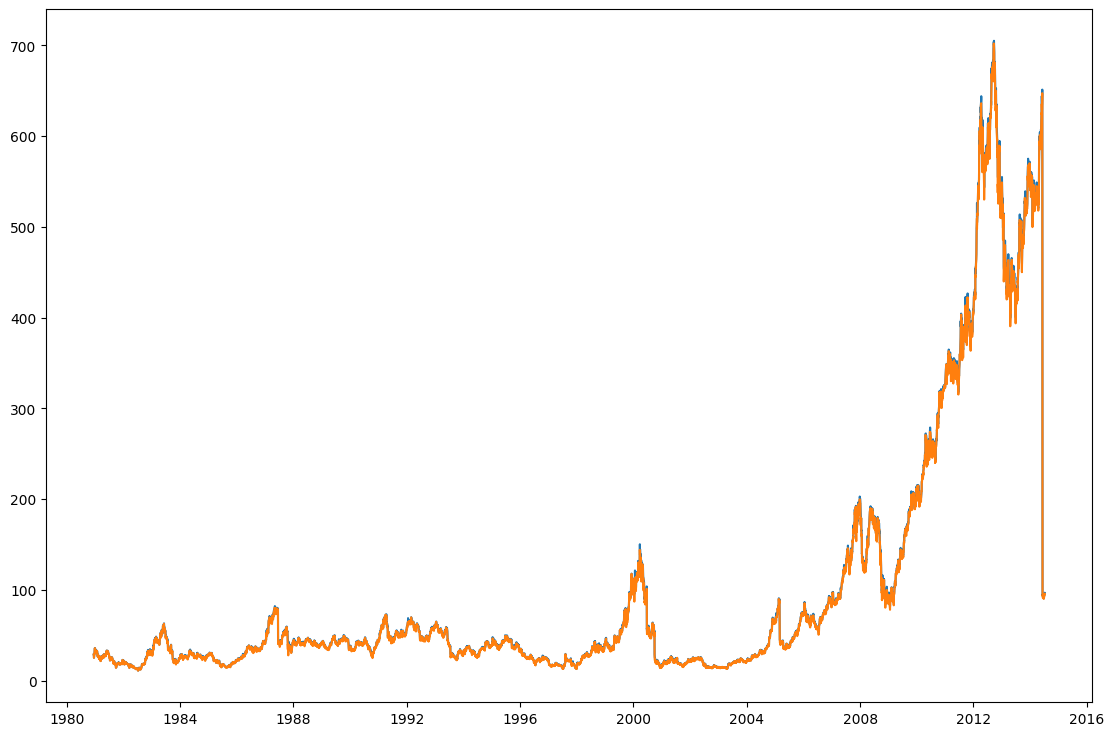

In [102]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['High'])
plt.plot(apple['Close']);
